<a href="https://colab.research.google.com/github/WaseemRaza844/Advance-Machine-Learning/blob/master/29thand30thDay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Swiss roll data 

In [0]:
from sklearn.datasets import make_swiss_roll
X_train, y_data = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

User Kernel PCA to transform the data

In [0]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_train)

Check the dimension of reduced data

In [0]:
print(f" X_train shape is {X_train.shape} and X_reduced shape is {X_reduced.shape}")

 X_train shape is (1000, 3) and X_reduced shape is (1000, 2)


Plot the data , original version ( mean Kernel = Linear)) vs Kernel = RBF

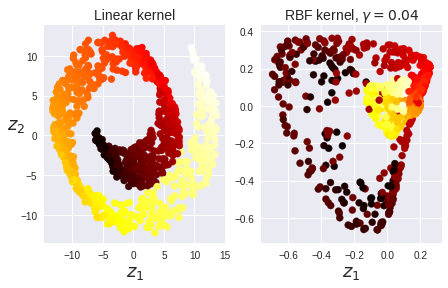

In [0]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)

y = y_data > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), 
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$") ) :
    X_reduced = pca.fit_transform(X_train)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_data, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


<!-- wp:paragraph -->
<p>Since we are using <g class="gr_ gr_3 gr-alert gr_spell gr_inline_cards gr_run_anim ContextualSpelling ins-del multiReplace" id="3" data-gr-id="3">kPCA</g> and it is an unsupervised learning algorithm, we have to find out what is the best kernel and hyper-parameters of the model.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>In Machine learning, generally PCA is used as the pre processing step of supervised learning , that means we can still use the grid search to find the value of hyper-parameters and Kernel which yields best results.</p>
<!-- /wp:paragraph -->

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Now print the best value found by Grid Search

#LLE

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X_train)

In [0]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


We are going to complete the exercise of chapter 8 of the Hands-on Machine learning book. 

###Problem Statement: 
 Load the MNIST dataset  and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.
 Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.
 Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?
 Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [0]:
from sklearn.datasets import fetch_mldata
#mnist_data = fetch_mldata('MNIST original') #Since the SKLEARN library was failin
#using the tensflow to download the MNIST data
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


Verify the size of the data. 

In [0]:
print(f"Length of the X_train : {X_train.shape}, Length of y_train is : {y_train.shape}")
print(f"Length of the X_test : {X_test.shape}, Length of y_test is : {y_test.shape}")

Length of the X_train : (60000, 28, 28), Length of y_train is : (60000,)
Length of the X_test : (10000, 28, 28), Length of y_test is : (10000,)


Convert the X_train and X_test data into 2d array

In [0]:
nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny))

Now , train the Random Forest Classifier and capture the time taken to train the model


In [0]:
from sklearn.ensemble import RandomForestClassifier  #Import library
import time
rf_clf = RandomForestClassifier()  #Initialize the model
start_time = time.time()
rf_clf.fit(d2_X_train, y_train)     #"Train the model"
print("Time taken by model :", "--- %s seconds ---" % (time.time() - start_time))


Time taken by model : --- 6.602773189544678 seconds ---


Perfrom the prediction on test data

In [0]:
y_predict =  rf_clf.predict(d2_X_test)

Now, lets measure the accuracy of the classifier

In [0]:
from sklearn.metrics import accuracy_score
print(f"Accuracy is {accuracy_score(y_predict, y_test)* 100} %")

Accuracy is 94.64 %


Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .95 )   #This will insure that 95% variance is covered
X_train_reduced  = pca.fit_transform(d2_X_train)

Verify the reduced shape before we start training new model

In [0]:
print(f" X_train shape is {d2_X_train.shape} and X_train_reduced shape is {X_train_reduced.shape}")

 X_train shape is (60000, 784) and X_train_reduced shape is (60000, 154)


Train a new Random Forest classifier on the reduced dataset and see how long it takes

In [0]:
rf_clf2 = RandomForestClassifier(random_state = 42)
start_time2 = time.time()
rf_clf2.fit(X_train_reduced, y_train)     #"Train the model"
print("Time taken by model :", "--- %s seconds ---" % (time.time() - start_time2))


Time taken by model : --- 12.577162742614746 seconds ---


Time taken by this new model is heigher than than our previous model.  This is common, using PCA does not always gurantee the faster speed.

Next evaluate the classifier on the test set

In [0]:
X_test_reduced = pca.transform(d2_X_test)  #Reduce the dimensionality first ""
y_predict2 = rf_clf2.predict(X_test_reduced)  #Predic the values using Model
print(f"Accuracy is {accuracy_score(y_predict2, y_test)* 100} %") #Print the accuracy

Accuracy is 90.09 %


Our model has predicted with accuracy of 90%. Performance of model is slightly degraded when you use the  PCA as we are reducing the dimensionality.